# Table of Contents
 <p>

- Explore `g1800s` in the IPython Shell using methods such as `.head()`, `.info()`, and `.describe()`.

In [2]:
import pandas as pd

g1800s = pd.read_csv('/home/dchen/Desktop/capstone/data/original/g1800 .txt')

In [3]:
g1800s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 205.2+ KB


In [4]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.000000,22.180000,22.000000,20.000000,19.000000,19.700000,18.900000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,29.200000,29.200000,29.000000,29.000000,29.200000,29.200000,29.000000,29.200000,29.160000,29.000000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,35.000000,35.100000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.180000,35.180000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.480000,51.090000,52.730000,52.580000,52.100000,54.160000,53.840000,54.140000,54.690000,51.620000


 - Use the `.plot()` method on `g1800s` with `kind='scatter'` to create a scatter plot with `'1800'` on the x-axis and `'1899'` on the y-axis.-

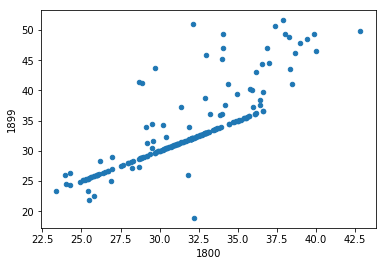

In [9]:
g1800s.plot(kind='scatter', x = '1800', y = '1899')
import matplotlib.pyplot as plt

plt.show()

make sure that the following assumptions about the data are true:

- `'Life expectancy'` is the first column (index `0`) of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to 0.
- There is only one instance of each country.

In [10]:
assert g1800s.columns[0] == 'Life expectancy'

In [15]:
assert g1800s['Life expectancy'].value_counts()[0] == 1

In [21]:
def check_null_or_valid(row_data):
    """checkes to see if values are missing and/or >= 0
    """
    no_na = row_data.dropna()[1:]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [22]:
assert g1800s.apply(check_null_or_valid, axis=1).all().all()

- Define a function called `check_null_or_valid()` that takes in one argument: `row_data`.
- Inside the function, convert `no_na` to a numeric data type using `pd.to_numeric()`.
- Write an assert statement to make sure the first column (index `0`) of the `g1800s` DataFrame is `'Life expectancy'`.
- Write an assert statement to test that all the values are valid for the `g1800s` DataFrame. Use the `check_null_or_valid()` function placed inside the `.apply()` method for this. Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the `.all()` method twice, and remember that you don't have to use `()` for functions placed inside `.apply()`.
- Write an assert statement to make sure that each country occurs only once in the data. Use the `.value_counts()` method on the `'Life expectancy'` column for this. Specifically, index `0` of `.value_counts()` will contain the most frequently occuring value. If this is equal to `1` for the `'Life expectancy'` column, then you can be certain that no country appears more than once in the data.

combine all the gapminder data into a single `gapminder` dataframe

- try doing it using a glob and a for loop
- try doing it using glob and a list comprehension

In [31]:
import glob

list_df = []

files = glob.glob('/home/dchen/Desktop/capstone/data/original/*.txt')

for fn in files:
    df = pd.read_csv(fn)
    list_df.append(df)

len(list_df)

3

In [33]:
gapminder = pd.concat(list_df)
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10,Albania
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50,Algeria


- Reshape `gapminder` by melting it. Keep `'Life expectancy'` fixed by specifying it as an argument to the `id_vars` parameter.
- Rename the three columns of the melted DataFrame to `'country'`, `'year'`, and `'life_expectancy'` by passing them in as a list to `gapminder_melt.columns`.

In [34]:
gm_melt = gapminder.melt(id_vars='Life expectancy')

In [36]:
gm_melt.columns = ['country', 'year', 'life_expectancy']

In [37]:
gm_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,NaN
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,NaN
4,Algeria,1800,NaN


- Convert the `year` column of `gapminder` using `pd.to_numeric()`.
- Assert that the `country` column is of type `np.object`. This has been done for you.
- Assert that the `year` column is of type `np.int64`.
- Assert that the `life_expectancy` column is of type `np.float64`.

In [42]:
import numpy as np

In [44]:
gm_melt['year'] = pd.to_numeric(gm_melt['year'])

assert gm_melt.country.dtype == np.object
assert gm_melt.year.dtype == np.int64
assert gm_melt.life_expectancy.dtype == np.float64

- Create a Series called `countries` consisting of the `'country'` column of `gapminder`.
- Drop all duplicates from `countries` using the `.drop_duplicates()` method.
- Write a regular expression that tests your assumptions of what characters belong in `countries`:
    - Anchor the pattern to match exactly what you want by placing a `^` in the beginning and `$` in the end.
    - Use `A-Za-z` to match the set of lower and upper case letters, `\.` to match periods, and `\s` to match whitespace between words.
- Use `str.contains()` to create a Boolean vector representing values that match the pattern.
- Invert the mask by placing a `~` before it.
- Subset the `countries` series using the `.loc[]` accessor and `mask_inverse`.

In [52]:
countries

0                      Abkhazia
1                   Afghanistan
2         Akrotiri and Dhekelia
3                       Albania
4                       Algeria
5                American Samoa
6                       Andorra
7                        Angola
8                      Anguilla
9           Antigua and Barbuda
10                    Argentina
11                      Armenia
12                        Aruba
13                    Australia
14                      Austria
15                   Azerbaijan
16                      Bahamas
17                      Bahrain
18                   Bangladesh
19                     Barbados
20                      Belarus
21                      Belgium
22                       Belize
23                        Benin
24                      Bermuda
25                       Bhutan
26                      Bolivia
27       Bosnia and Herzegovina
28                     Botswana
29                       Brazil
                 ...           
230     

In [57]:
countries = gm_melt['country']

countries = countries.drop_duplicates()

pattern = '^[A-Za-z\.\s]*$'

In [60]:
countries[~countries.str.contains(pattern)]

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

- Assert that `country` and `year` do not contain any missing values. The first assert statement has been written for you. Note the chaining of the `.all()` method to `pd.notnull()` to confirm that *all* values in the column are not null.
- Drop the rows in the data where *any* observation in `life_expectancy` is missing. As you confirmed that `country`
and `year` don't have missing values, you can use the `.dropna()` method on the *entire* `gapminder` DataFrame, because any missing values would have to be in the `life_expectancy` column. The `.dropna()` method has the default keyword arguments `axis=0` and `how='any'`, which specify that *rows* with *any* missing values should be dropped.
- Print the shape of `gapminder`.

- Group `gapminder` by `'year'` and aggregate `'life_expectancy'` by the mean. To do this:
    - Use the `.groupby()` method on `gapminder` with `'year'` as the argument. Then select `'life_expectancy'` and chain the `.mean()` method to it.

- Create a histogram of the `life_expectancy` column using the `.plot()` method of `gapminder`. Specify `kind='hist'`.


- Create a line plot of average life expectancy per year by using the `.plot()` method (without any arguments) on `gapminder_agg`.

- Save `gapminder` and `gapminder_agg` to csv files called `'gapminder.csv'` and `'gapminder_agg.csv'`, respectively, using the `.to_csv()` method.

In [61]:
gapmider_agg = gm_melt.groupby('year')['life_expectancy'].mean()

In [62]:
gapmider_agg

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
1805    31.562537
1806    31.615970
1807    31.573134
1808    31.376766
1809    31.310448
1810    31.521741
1811    31.481891
1812    31.472736
1813    31.467214
1814    31.516318
1815    31.647413
1816    31.627512
1817    31.721542
1818    31.574726
1819    31.488607
1820    31.560796
1821    31.620597
1822    31.722090
1823    31.770647
1824    31.709005
1825    31.666816
1826    31.597313
1827    31.633582
1828    31.577861
1829    31.559950
          ...    
1987    65.868069
1988    66.144406
1989    66.402475
1990    66.784615
1991    66.844663
1992    67.026875
1993    67.092500
1994    67.006106
1995    67.220000
1996    67.412404
1997    67.623541
1998    67.762344
1999    67.934880
2000    68.077703
2001    68.437943
2002    68.653254
2003    68.935550
2004    69.184211
2005    69.524019
2006    69.850190
2007    70.139712
2008    70.447163
2009    70.767740
2010    70.969904
2011 

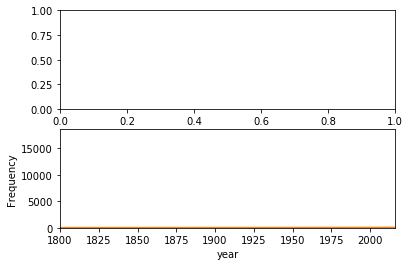

In [74]:
fig = plt.figure()
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1 = gm_melt.life_expectancy.plot(kind='hist')
ax2 = gapmider_agg.plot(kind='line')

plt.show()

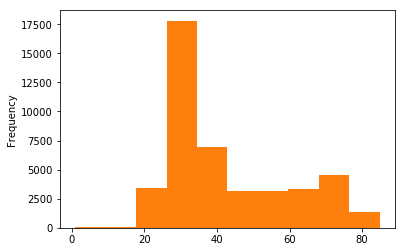

In [71]:
gm_melt.life_expectancy.plot(kind='hist')
plt.show()

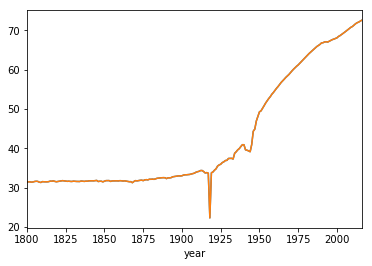

In [73]:
gapmider_agg.plot(kind='line')
plt.show()